In [86]:
#Lets do XGBoost Regression for Graduate Admissions

In [87]:
import numpy as np # linear Algebra
import pandas as pd # data processing

data=pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
data.drop('Serial No.',inplace=True,axis=1)
print(data.shape)

(500, 8)


<IPython.core.display.Javascript object>


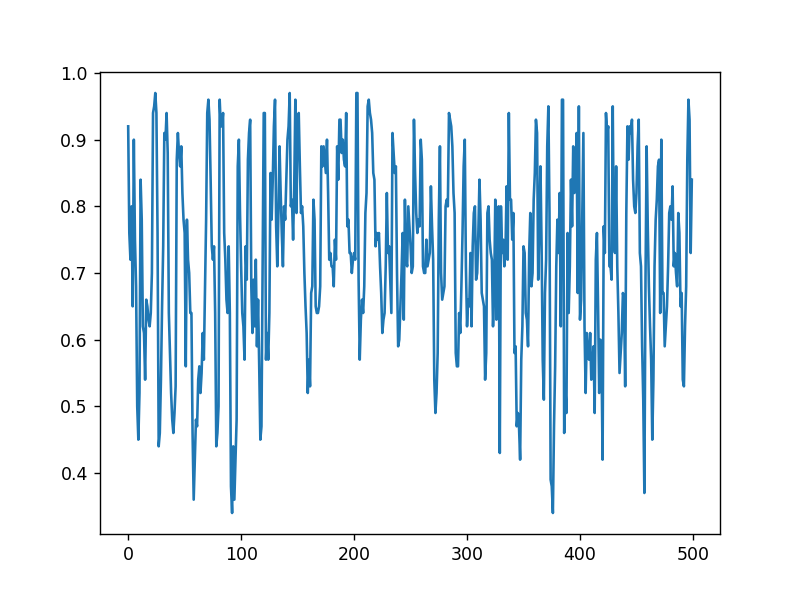

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
data['Chance of Admit '].plot()

In [53]:
#final_y=data.pop('Chance of Admit ')
print(final_y)


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
470    0.87
471    0.64
472    0.90
473    0.67
474    0.67
475    0.59
476    0.62
477    0.65
478    0.71
479    0.79
480    0.80
481    0.78
482    0.83
483    0.71
484    0.73
485    0.70
486    0.68
487    0.79
488    0.76
489    0.65
490    0.67
491    0.54
492    0.53
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64


In [90]:
#Now lets run the XGBoost for Regression
#pip3 install xgboost using anaconda prompt

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,final_y,test_size=0.33,random_state=123)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
426,312,106,3,3.0,5.0,8.57,0,0.71
6,321,109,3,3.0,4.0,8.20,1,0.75
147,326,114,3,3.0,3.0,9.11,1,0.83
175,320,111,4,4.5,3.5,8.87,1,0.85
356,327,109,3,3.5,4.0,8.77,1,0.79


In [91]:
y_train.head()

426    0.71
6      0.75
147    0.83
175    0.85
356    0.79
Name: Chance of Admit , dtype: float64

In [92]:
"""
eta [default=0.3, alias: learning_rate]

Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the 
weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
range: [0,1]

subsample [default=1]

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the
training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
range: (0,1]

colsample_bytree is the subsample ratio of columns when constructing each tree.
Subsampling occurs once for every tree constructed.

"""

'\neta [default=0.3, alias: learning_rate]\n\nStep size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the \nweights of new features, and eta shrinks the feature weights to make the boosting process more conservative.\nrange: [0,1]\n\nsubsample [default=1]\n\nSubsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the\ntraining data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.\nrange: (0,1]\n\ncolsample_bytree is the subsample ratio of columns when constructing each tree.\nSubsampling occurs once for every tree constructed.\n\n'

In [93]:
xgdmat=xgb.DMatrix(X_train,y_train)

#https://xgboost.readthedocs.io/en/latest/parameter.html
params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}

gb=xgb.train(params,xgdmat) #params followed by the DMatrix

testdmat=xgb.DMatrix(X_test)

y_pred=gb.predict(testdmat)

print(y_pred)

[0.6967846  0.7712563  0.55945295 0.5909102  0.71098816 0.643306
 0.76140755 0.6755093  0.59701866 0.76140755 0.76140755 0.6831415
 0.7712563  0.56509805 0.59792703 0.7104865  0.5227808  0.66004694
 0.7645122  0.60817474 0.51073277 0.66904676 0.73250556 0.63491946
 0.71098816 0.6321765  0.57568485 0.556251   0.7712563  0.7392497
 0.49866018 0.65508974 0.634701   0.59792703 0.50560045 0.73250556
 0.73250556 0.6839618  0.76140755 0.579492   0.60588765 0.5834022
 0.60511607 0.75466347 0.69095707 0.63117653 0.58037156 0.63723636
 0.7712563  0.75570726 0.6679126  0.56458527 0.5584261  0.60022664
 0.5426359  0.52685004 0.61704373 0.51752865 0.58551896 0.6318447
 0.7472036  0.75466347 0.66165614 0.5227808  0.6245442  0.7712563
 0.7645122  0.73250556 0.70352876 0.7712563  0.58808845 0.6761972
 0.60817474 0.73250556 0.55089766 0.7712563  0.63482857 0.5503062
 0.56408924 0.6282812  0.6544019  0.51453996 0.7712563  0.6831415
 0.6831415  0.6679126  0.639918   0.5363248  0.6448686  0.6147308
 0.771

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [94]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test.values,y_pred))
print(testScore)

0.1030393254214261


In [95]:
print("Accuracy",(1-testScore)*100)

Accuracy 89.69606745785738


In [96]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [97]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [98]:
features2=['GRE Score','CGPA']
features3=['GRE Score','CGPA','TOEFL Score']
features4=['GRE Score','CGPA','TOEFL Score','University Rating']
features5=['GRE Score','CGPA','TOEFL Score','University Rating','SOP']


results={}

data2=data.loc[:,features2].copy()
xgdmat = xgb.DMatrix(data=data2, label=final_y)
cv_results = xgb.cv(dtrain=xgdmat, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)
results['testScore2']=(1-cv_results["test-error-mean"]).iloc[-1]

data3=data[features3].copy()
xgdmat = xgb.DMatrix(data=data3, label=final_y)
cv_results = xgb.cv(dtrain=xgdmat, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)
results['testScore3']=(1-cv_results["test-error-mean"]).iloc[-1]

data4=data[features4].copy()
xgdmat = xgb.DMatrix(data=data4, label=final_y)
cv_results = xgb.cv(dtrain=xgdmat, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)
results['testScore4']=(1-cv_results["test-error-mean"]).iloc[-1]

data5=data[features5].copy()
xgdmat = xgb.DMatrix(data=data5, label=final_y)
cv_results = xgb.cv(dtrain=xgdmat, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)
results['testScore5']=(1-cv_results["test-error-mean"]).iloc[-1]

d=pd.Series(results)
d.sort_values(axis=0, ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


testScore2    0.723609
testScore4    0.723562
testScore3    0.722572
testScore5    0.722449
dtype: float64

In [99]:
#So we can conclude by saying that GRE,TOEFL and CGPA Scores are enough for Predicting the Admission 